# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane had the lowest tumor sizes compared to other treatments, with Ramicane having the lowest recorded size. The two treatments were also recorded the most. The mouse's weight and tumor volume have a strong correlation of 0.84.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Timepoint","Mouse ID"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicates)==False]
clean_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_study["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_stats = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"]

drs_mean = drug_regimen_stats.mean()
drs_median = drug_regimen_stats.median()
drs_var = drug_regimen_stats.var()
drs_std = drug_regimen_stats.std()
drs_sem = drug_regimen_stats.sem()

statistics_summary = pd.DataFrame({"Mean Tumor Volume":drs_mean,
                                   "Median Tumor Volume":drs_median,
                                   "Tumor Volume Variance":drs_var,
                                   "Tumor Volume Std. Dev.":drs_std,
                                   "Tumor Volume Std. Err.":drs_sem})
statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_stats.agg(["mean","median","var","std","sem"])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

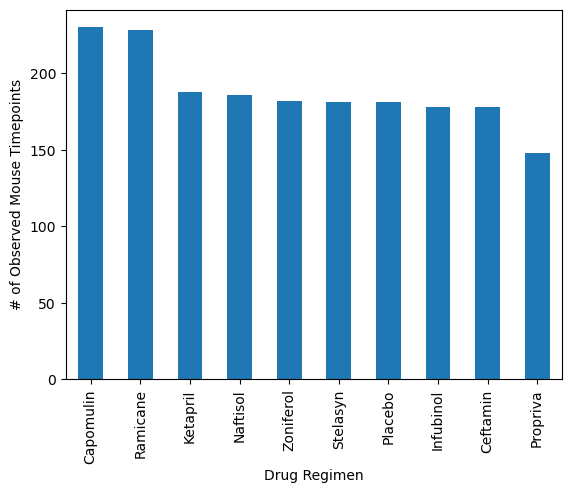

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_study["Drug Regimen"].value_counts().plot(y="Mouse ID",kind="bar",ylabel="# of Observed Mouse Timepoints")
plt.show()

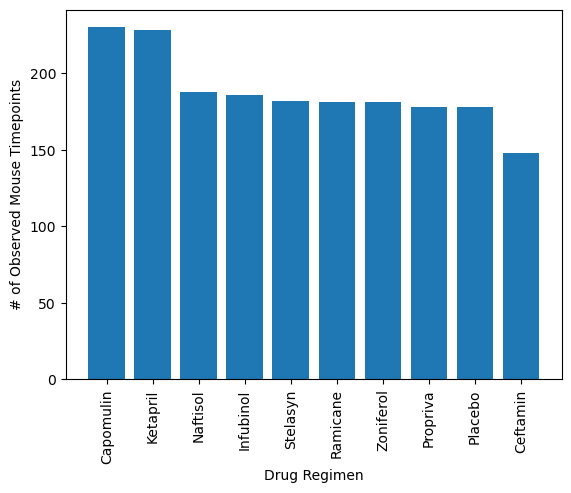

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = clean_study["Drug Regimen"].unique()
y = clean_study["Drug Regimen"].value_counts()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

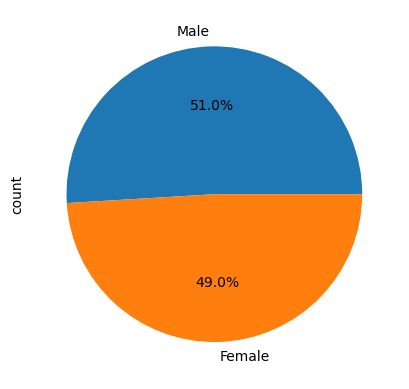

In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
clean_study["Sex"].value_counts().plot.pie(y="Mouse ID",ylabel="count",autopct="%1.1f%%",)
plt.show()



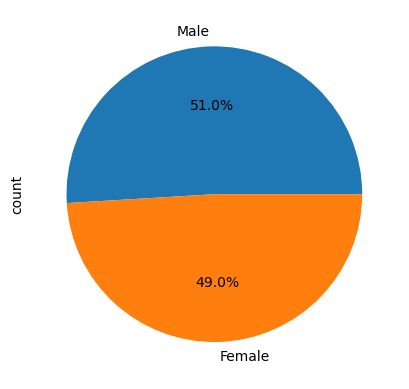

In [21]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.pie(clean_study["Sex"].value_counts(),autopct="%1.1f%%",labels=["Male","Female"])
plt.ylabel("count")
plt.show()



## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_study.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_tp,clean_study,on=("Timepoint","Mouse ID"))


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in Drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    var_tumor_vol = merged_df.loc[merged_df["Drug Regimen"]==i,"Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(var_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = var_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = var_tumor_vol.loc[(var_tumor_vol < lower_bound) | (var_tumor_vol > upper_bound)]
    print(f"{i}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


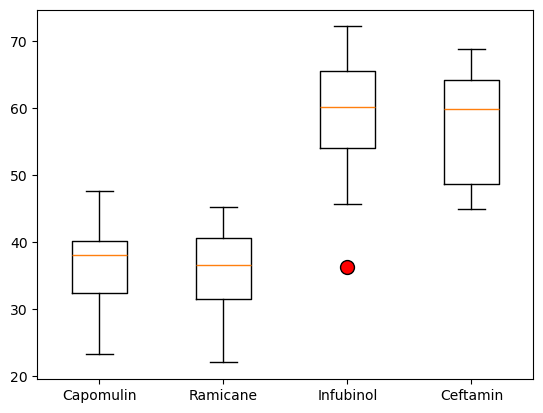

In [25]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(markerfacecolor="red",markersize=10)

plt.boxplot(tumor_vol_data,labels=Drug_list,flierprops=flierprops)
plt.show()

## Line and Scatter Plots

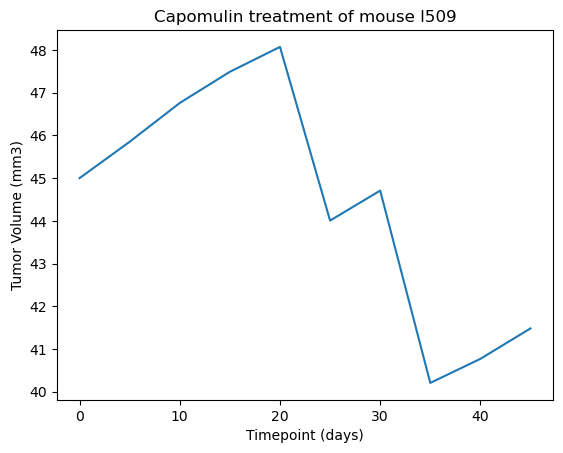

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_study.loc[clean_study["Mouse ID"]=="l509"]

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.plot(mouse_l509["Timepoint"],mouse_l509["Tumor Volume (mm3)"])
plt.show()

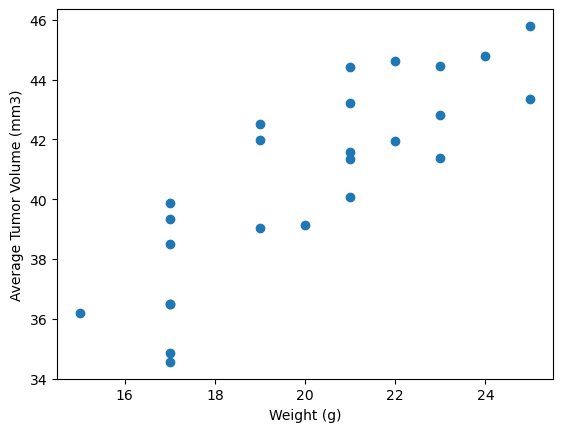

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin = clean_study.loc[clean_study["Drug Regimen"]=="Capomulin"]
avg_vol = Capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_weight = Capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(avg_weight,avg_vol)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


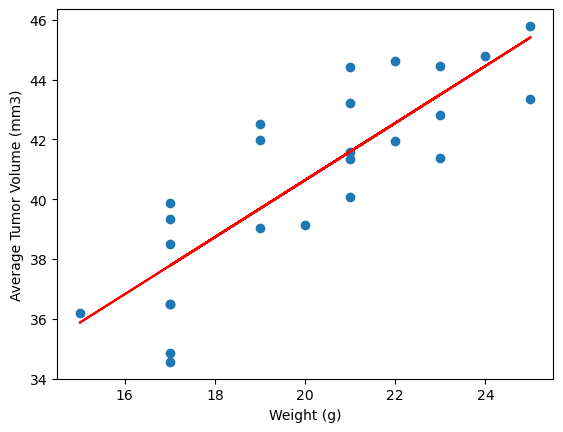

In [29]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_weight,avg_vol)
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(avg_weight,avg_vol)
regress_values = avg_weight * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is: {correlation[0]:.2f}")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(avg_weight,avg_vol)
plt.plot(avg_weight,regress_values,color="red")
plt.show()
